# MAE598 HW 2

Name: Zachary Poit

### Question 1: 

Function: $ 2 x_1^2 - 4 x_1 x_2 + 1.5 x_2^2 + x_2$

$ \nabla f = 
\begin{bmatrix}
4 (x_1 - x_2) \\
-4 x_1 + 3 x_2 + 1 \\
\end{bmatrix}$ 

$ H_f = 
\begin{bmatrix}
4 & -4 \\
-4 & 3 \\
\end{bmatrix}$

$ \left| H - I \lambda \right| = \begin{bmatrix}
4- \lambda & -4 \\
-4 & 3 -\lambda\\
\end{bmatrix} = \lambda^2 - 7 \lambda -4$ 

$\lambda_{1,2} = \frac{7 \pm \sqrt{65}}{2}$ 

The eigen values are not all positive or all negitive or zero so the Hessian is a indefinite matrix. So we have a saddle!

Taylor expansion at saddle point (Gradient is zero): $ f(x_1,x_2) = f(1,1) + \frac{1}{2} \begin{bmatrix}
x_1 - 1 & x_2 - 1\\
\end{bmatrix}\begin{bmatrix}
4 & -4 \\
-4 & 3 \\
\end{bmatrix}\begin{bmatrix}
x_1 - 1 \\
 x_2 - 1\\
\end{bmatrix}$

$ f(x_1,x_2) = f(1,1) + \frac{1}{2} \begin{bmatrix}
\partial x_1 & \partial x_2\\
\end{bmatrix}\begin{bmatrix}
4 & -4 \\
-4 & 3 \\
\end{bmatrix}\begin{bmatrix}
\partial x_1 \\
\partial x_2\\
\end{bmatrix}$

$ f(x_1,x_2) = f(1,1) + \frac{1}{2} \left( 4 \partial x_1^2 - 8 \partial x_1 \partial x_2 + 3 \partial x_2^2\right) $

$ f(x_1,x_2) = f(1,1) + 

Factor this to put it in form $ f(x_1,x_2) = f(1,1) + \left( a \partial x_1 - b \partial x_2 \right)\left( c \partial x_1 - d \partial x_2 \right)$

We get the following equations:

$ ac = 2$

$bd = 1.5$

$ad + bc = 4$

If we set $ a = 1 $ then, $ c = 2 $, $ d = 1 $, and $ b = \frac{3}{2}$

$ f(x_1,x_2) = f(1,1) + \left( \partial x_1 - \frac{3}{2} \partial x_2 \right)\left( 2\partial x_1 - \partial x_2 \right)$

$ \left( \partial x_1 - \frac{3}{2} \partial x_2 \right)\left( 2\partial x_1 - \partial x_2 \right) < 0$ 

Two cases for the directions: 

Case 1: $ \left( \partial x_1 - \frac{3}{2} \partial x_2 \right) > 0$ and $\left( 2\partial x_1 - \partial x_2 \right) < 0$ 

Case 2: $ \left( \partial x_1 - \frac{3}{2} \partial x_2 \right) < 0$ and $\left( 2\partial x_1 - \partial x_2 \right) > 0$ 


### Question 2: 

#### Part a:

Step 1: solve the problem with just multivarite Calculus concepts:

Reference point:

$ P = (-1,0,1)^T $

A point on the plane:

$ Q = (1,0,0)^T $

vector from Q to P:

$ v = P - Q = (-2, 0, 1)^T $

Normal vector: 

$ \hat{n} = \frac{(1,2,3)^T}{\sqrt{1^2 + 2^2 + 3^2}} = \left(\frac{1}{\sqrt{14}},\frac{2}{\sqrt{14}},\frac{3}{\sqrt{14}}\right)^T$

Find distance shortest distance between reference point and plane

$D = v^T \hat{n} = (-2, 0, 1) \left(\frac{1}{\sqrt{14}},\frac{2}{\sqrt{14}},\frac{3}{\sqrt{14}}\right)^T = \frac{1}{\sqrt{14}}$

Subtract that distance times normal vector from reference point to get answer!

$ A = P - D*\hat{n} = (-1,0,1)^T - \left(\frac{1}{14},\frac{2}{14},\frac{3}{14}\right)^T = \left(-\frac{15}{14},-\frac{1}{7},\frac{11}{14}\right)^T$

Step 2: Solve the problem using optimization:

Distance from any point to the reference point is the 2 - norm. 

$ D = \sqrt{(x_1 + 1)^2 + x_2^2 + (x_3 - 1)^2} $

Minimizing $D^2$ will minimize $D$.

So is $f(x) = (x_1 + 1)^2 + x_2^2 + (x_3 - 1)^2$ convex? 

The Hesssian of this matrix is:

$ H_f = 
\begin{bmatrix}
10 & 12 \\
12 & 20 \\
\end{bmatrix}$

The eigenvalues of the hessian matrix are 2 and 28. So the distance squared is a convex function. 

There is also $x_1 + 2x_2 + 3x_3 = 1$ which is a convex set (convex plane) which constrains $x_1, x_2, x_3$ to the plane.

To make it unconstrained optimization problem, substitute into the convex function. 

$ f(x) = (1 - 2x_2 - 3x_3 + 1)^2 + x_2^2 + (x_3 - 1)^2 $

#### Part B:

 Gradient Descent (Inexact Line Search):


In [95]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.array([3,4])    # Intial points tested

# function to compute gradient at a given x value
def grad(x):
    dfdx_0 = 2*(5*x[0] + 6*x[1] - 4) 
    dfdx_1 = 2*(6*x[0] + 10*x[1] - 7)
    return np.array([dfdx_0,dfdx_1])

# function to evaluate D^2
def distance(x):
    return (2 - 2*x[0] - 3*x[1]) ** 2 + (x[0]) ** 2 + (x[1] - 1) ** 2

# function to evaluate hessian at a given x value (Hessian is always the same though)
def Hess(x): 
    dfd2x = np.zeros([2,2])
    dfd2x[0,0] = 10
    dfd2x[0,1] = 12
    dfd2x[1,0] = dfd2x[0,1]
    dfd2x[1,1] = 20
    
    return dfd2x

In [96]:


# Recursive function that does the line search reduction of alpha
def reduce_alpha_grad(x,alpha):
    phi = distance(x) - t*np.dot(grad(x),grad(x))*alpha         # Calculate Phi
    if (distance(x - alpha*grad(x)) > phi):                     # If alpha does not meet criteria, cut it in half
        alpha = 0.5* alpha
        return reduce_alpha_grad(x,alpha)                       # Have the function call itself (recursion)
    else: 
        return alpha                                            # Otherwise return alpha
                                        
t = .5                      # T value chosen
distance_list_grad = [x0]   # Use list to store values
k = 0                       # list index

while (np.linalg.norm(grad(distance_list_grad[k])) > 0.0000001):        # Run While norm of gradient is larger than tolerance. 
    old = distance_list_grad[k]                                         # store last value in old 
    alpha = 1                                                           # Start alpha at 1 or reset it to 1
    alpha = reduce_alpha_grad(old,alpha)                                # reduce alpha for line search
    new = old - alpha*grad(old)                                         # get new based on gradient of old
    distance_list_grad.append(new)                                      # append new to list
    k += 1                                                              # increase index
    # print(new)

print("Intial Conditions [x2 x3]: " + str(x0))                          # output intial conditions
print("Iterations: " + str(len(distance_list_grad)-1))                  # output iterations

x2x3 = distance_list_grad[len(distance_list_grad)-1]                    # get last iteration values

x_2 = x2x3[0]                                                           # Get x1, x2, and x3
x_3 = x2x3[1]
x_1 = 1 - 2*x_2 - 3*x_3

print("X1 = " + str(x_1))                                               # display x1, x2, x3
print("X2 = " + str(x_2))
print("X3 = " + str(x_3))





Intial Conditions [x2 x3]: [3 4]
Iterations: 65
X1 = -1.0714285792263327
X2 = -0.14285711468646373
X3 = 0.7857142695330868


Newtons Method: 

In [97]:
distance_list_newt = [x0]                                               # Use list to store values
k = 0                                                                   # index of list

while (np.linalg.norm(grad(distance_list_newt[k])) > 0.0000001):        # Run While norm of gradient is larger than tolerance.
    old = distance_list_grad[k]                                         # store last value in old 
    h = -np.linalg.solve(Hess(old),grad(old))                           # solve Ax = b. solution: x = -A^{-1}b
    new = old + h                                                       # get new based on gradient of old
    distance_list_newt.append(new)                                      # append new to list
    k += 1                                                              # increase index

print("Intial Conditions [x2 x3]: " + str(x0))                          # output intial conditions
print("Iterations: " + str(len(distance_list_newt)-1))                  # output iterations

x2x3 = distance_list_newt[len(distance_list_newt)-1]                    # get last iteration values

x_2 = x2x3[0]                                                           # Get x1, x2, and x3
x_3 = x2x3[1]
x_1 = 1 - 2*x_2 - 3*x_3

print("X1 = " + str(x_1))                                               # display x1, x2, x3
print("X2 = " + str(x_2))
print("X3 = " + str(x_3))


Intial Conditions [x2 x3]: [3 4]
Iterations: 1
X1 = -1.071428571428572
X2 = -0.14285714285714235
X3 = 0.7857142857142856


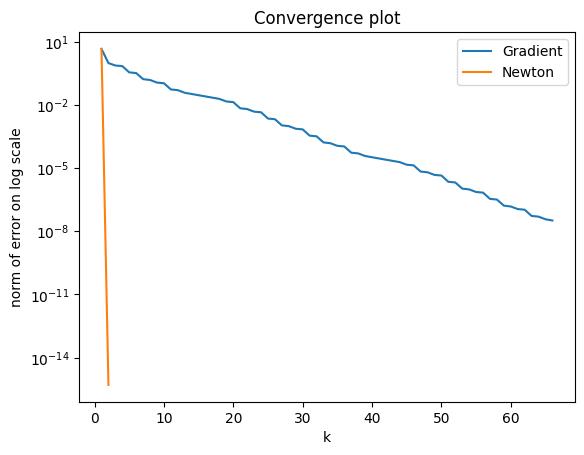

In [98]:

x_sol = np.array([-1/7, 11/14])                 # Exact solution
norm_of_error = []                              # List to plot

for f in distance_list_grad:                    # get norm of f - x_sol and store them in list for gradient 
    n_of_e = np.linalg.norm(f - x_sol)
    norm_of_error.append(n_of_e)
    
t = np.arange(1,len(distance_list_grad)+1)      # determine t to plot against

plt.plot(t,norm_of_error,label='Gradient')      # Plot gradient 

norm_of_error = []                              # Reset norm of error list

for f in distance_list_newt:                    # Do same process for newtons method
    n_of_e = np.linalg.norm(f - x_sol)
    norm_of_error.append(n_of_e)

t = np.arange(1,len(distance_list_newt)+1)      # determine new t to plot against

plt.plot(t,norm_of_error,label='Newton')        # Plot newtons method
plt.yscale('log')                               # make log linear plot
plt.legend()
plt.title('Convergence plot')
plt.xlabel('k')
plt.ylabel('norm of error on log scale')

plt.show()                                      # Show plot

The intitial points I tested were $x_2 = 3$ and $x_3 = 4 $ for both methods. The gradient method converged to a solution of $x_2 = -0.142857$ and $x_3 = 0.785714$. It converged in 65 iterations. The newton method converged to a solution of $x_2 = -0.142857$ and $x_3 = 0.785714$. It converged in 1 iteration. The convergence plot is above. The newton plot converged instantly while it took gradient much more time to converge with less accuracy. 

### Question 3:

Define function $f(x) = a^T x = a_1 x_1 + a_2 x_2 + ... + a_n x_n$

$\nabla f = a$

$H_f = 0_{nxn}$

Since the Hessian is Positive semi definite, the function is convex. (It is also negitive semi definite, so also concave)

If $f(x)$ is convex then $ S_1 = \{ x \in \mathbb{R}^n | f(x) \leq c \}$ is convex set. This is a half hyper space

The other half hyper space $ S_2 = \{ x \in \mathbb{R}^n | f(x) \geq c \}$ is also convex. 

The intersection of these two half hyper spaces gives us the set $ S_1 \cap S_2 = S_3 = \{ x \in \mathbb{R}^n | f(x) = c \}$ which is the hyper plane 

The intersection of two convex sets are convex.

### Question 4:

#### Part A:

There are $n$ lamps. There are $m$ mirrors. 

$\bold{p}$ represents the power output and $\bold{p} \in \mathbb{R}^{n}$. But $p_i$ is limited to be between $0$ and $p_{max}$ 

$\bold{a}_k$ represents the parameters of mirror $k$. Each mirror has $n$ parameters so $\bold{a} \in \mathbb{R}^n$. 

$ \bold{a}_k^T \bold{p}$ gives the intensity at mirror $k$.  So $ I = \bold{a}_k^T \bold{p}$

The $h(I,I_t)$ has two cases. 

When $ I_t \geq I$, then $ h = \frac{I_t}{I}$

When $ I \geq I_t$, then $ h = \frac{I}{I_t}$

![h function](hfunction.png)

By inspection we can see that this is a convex function. The first part is monotonically decreasing,the second part is monotonically increasing,and the parts meet at the global minimum.  But it is only convex for $ I > 0 $. So second derivative of this function must be zero because the function is convex. $\frac{d^2h}{dI^2} = h'' \geq 0$



When $I = I_t$ then $h = 1$. At this point these two cases have the same value so the function is continuous but not directly differentiable. 

Applying chain rule and product rule where $ I = \bold{a}_k^T \bold{p}$ :

$\frac{\partial h}{\partial\bold{p}} = \frac{\partial h}{\partial I} \frac{\partial \bold{a}_k^T\bold{p}}{\partial \bold{p}} = h' a $

$\frac{\partial^2h}{\partial\bold{p}^2} = \frac{\partial}{\partial \bold{p}}\left(\frac{\partial h}{\partial \bold{p}}\right) = \frac{\partial}{\partial \bold{p}}\left( \frac{\partial h}{\partial I} \frac{\partial \bold{a}_k^T\bold{p}}{\partial \bold{p}} \right) = \frac{\partial}{\partial \bold{p}}\left( \frac{\partial h}{\partial I} \right) \cdot \frac{\partial \bold{a}_k^T\bold{p}}{\partial \bold{p}} + \frac{\partial h}{\partial I}  \cdot \frac{\partial^2 \bold{a}_k^T\bold{p}}{\partial \bold{p}^2}  = h'' \bold{a}\bold{a}^T$ 

$\bold{a}\bold{a}^T$ is a matrix with entries equal to $a_i a_j$ where $i$ and $j$ represent rows and columns respectfully. It is also an rank 1 matrix. One eigenvalue is equal to $\bold{a}^T\bold{a}$ and all other eigenvalues are equal to zero. $\bold{a}\bold{a}^T$ is then positive semi definite. 

Because $h'' \geq 0$ and $\bold{a}\bold{a}^T$ is p.s.d. then $\frac{\partial^2h}{\partial\bold{p}^2}$ must be p.s.d thus making every $h(\bold{a}_k^T\bold{p})$ convex (not strictly convex).

The maximum of all the k convex functions is also going to be convex. But where is the function convex? 

Since $ \bold{p} $ is the optimization variable then $ \bold{a}_k^T \bold{p}$ is a linear equation with the form:

$I = \bold{a}_k^T \bold{p} = a_{k,1}p_1 + a_{k,2}p_2 + ... + a_{k,n}p_n $

Substituting $I$ into $h$: 

When $ I \geq I_t$, then $h = \frac{I}{I_t}= \frac{a_{k,1}p_1  + ... + a_{k,n}p_n}{I_t}$ 

When $ I \leq I_t$, then $h = \frac{I_t}{I}= \frac{I_t}{a_{k,1}p_1  + ... + a_{k,n}p_n}$

So like earlier we said for $h $ to be convex, the condition $I>0$, so when the substitution is done, the following condition is equivalent: $ \bold{a}_k^T \bold{p} > 0$

The function $\underset{k}{\max}\{h\left(\bold{a}_k^T \bold{p},I_t\right)\}$ is convex but only for $ \bold{a}_k^T \bold{p} > 0$

Are the constraints convex? Well $p_i > 0 $ is a half space. $p_i < p_{max} $ is also a half space. Both are convex. The intersection of two half spaces which are convex is convex, so the constraints are also convex. 

Both the function and the constraints are convex so, the problem is convex. It has a unique solution because it is convex. 

#### Part B:

There are n lamps. 10 of them need to have a total power of less than $p^*$.

So we could add a constraint to the minimization problem. By the following: 

Pick any random 10 powers from $\bold{p}$ and put them into a list $X$. $R$ will be length of the list and $r$ will be the index. The constraint is $\underset{r=1}{\overset{R}{\sum}}X_r < p^{*}$. 

$\underset{r=1}{\overset{R}{\sum}}X_r = X_1 + X_2 + X_3 + ... X_{10}$ where $X_1$ may be equal to $p_{23}$ and $X_2$ may be equal to $p_{67}$ and so on...

The summation is a linear function. When it is bounded by the $p^{*}$, it becomes a half space which is convex. 

With the new constraint the problem still remains convex. Because it is convex, it has a unique solution. 

#### Part C: 

There are n lamps but only 10 of them can be on $(p>0)$. To do this set $n-10$ entries of $\bold{p}$ to zero. It is exactly the same as solving the problem with exactly 10 lamps. The number of lamps will not change the convexity and so there will be a unique solution (There would be a unique solution for any n on lamps that have $p>0$).

If that is not satisfactory, I could add $n - 10$ constraints where each has $p_i= 0$. These are lines that are convex. So as the function and all of the constraints are convex the problem remains convex with a unique solution. 

### Question 5: 

For any $x \in \mathbb{R}$, the function $f(y) = xy - c(x)$ is a line. The line is convex. 

For every $x \in \mathbb{R}$, I make a line and put them all together in a set of functions. 

All of the lines have a unique slope based on their unique x. 

So I have a bunch of lines with the form $C_1 y + C_2$ in the set and I take point-wise maximum all the lines in the set. 

The maximum of any number of convex functions is also convex, so $C^{\star}(y)$ is convex